This Note book is Developed by the **Prashant Kumar Singh**

In [31]:
##Importing the important Dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
sheet_id="1WFt4PL1iHBtQ3bTphOcwOG0q2VssQCCy_9KdvW-Vb4Q"
sheet_name="preprocessed-data"
url=f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [130]:
data=pd.read_csv(url)

In [131]:
data.head(2)

,date,State,Local_Government,Market_Name,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,1KG,actual,Wholesale,NGN,175.92,1.5525,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,1KG,actual,Wholesale,NGN,150.18,1.3254,2002,January,Dry Season,12.876579


In [36]:
## Checking all the columns name
data.columns

Index(['date', 'State', 'Local_Government', 'Market_Name', 'latitude',
       'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice', 'year', 'month', 'season',
       'Inflation'],
      dtype='object')

In [132]:
## Checking the Currency unique values
data['currency'].unique()

array(['NGN'], dtype=object)

## Currency feature has only one values that is 'NGN' hence it shows all the price are in NGN hence there is no meaning of the Currency columns , Hence I am deleting it from the data.

In [133]:
### Deleting the currency columns and renamaming the price columns to nigerian price
data.drop(columns='currency',inplace=True)
data.rename(columns={"price":"NGN_Price"},inplace=True)

In [134]:
data.head()

,date,State,Local_Government,Market_Name,latitude,longitude,category,commodity,unit,priceflag,pricetype,NGN_Price,usdprice,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,1KG,actual,Wholesale,175.92,1.5525,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,1KG,actual,Wholesale,150.18,1.3254,2002,January,Dry Season,12.876579
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),1KG,actual,Wholesale,358.70,3.1656,2002,January,Dry Season,12.876579
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,1KG,actual,Wholesale,155.61,1.3733,2002,January,Dry Season,12.876579
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),1KG,actual,Wholesale,196.87,1.7374,2002,January,Dry Season,12.876579


In [135]:
data.info() ### Checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64221 entries, 0 to 64220
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              64221 non-null  object 
 1   State             64221 non-null  object 
 2   Local_Government  64221 non-null  object 
 3   Market_Name       64221 non-null  object 
 4   latitude          64221 non-null  float64
 5   longitude         64221 non-null  float64
 6   category          64221 non-null  object 
 7   commodity         64221 non-null  object 
 8   unit              64221 non-null  object 
 9   priceflag         64221 non-null  object 
 10  pricetype         64221 non-null  object 
 11  NGN_Price         64221 non-null  float64
 12  usdprice          64221 non-null  float64
 13  year              64221 non-null  int64  
 14  month             64221 non-null  object 
 15  season            64221 non-null  object 
 16  Inflation         64221 non-null  float6

In [136]:
## Checking the nul values if availables
data.isnull().sum()

date                0
State               0
Local_Government    0
Market_Name         0
latitude            0
longitude           0
category            0
commodity           0
unit                0
priceflag           0
pricetype           0
NGN_Price           0
usdprice            0
year                0
month               0
season              0
Inflation           0
dtype: int64

## **There are no null values with the data.**

In [137]:
## Cheching the data feature into date
data['date']=pd.to_datetime(data['date'],format='%Y-%m-%d')

In [138]:
## checking the unit unique values
data['unit'].unique()

array(['1KG', 'Unit', 'L', '30 pcs', '100 Tubers'], dtype=object)

# There are unit into 'L' , 30 pics and Tubers ,we need to convert the 'L' into 1KG , hence 1 L = 1KG

In [139]:
df=data.copy()
df['unit']=df['unit'].apply(lambda x : "1KG" if x=='L' else x )

In [140]:
df['unit'].unique()

array(['1KG', 'Unit', '30 pcs', '100 Tubers'], dtype=object)

In [17]:
### checking how many year of data we have
df['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

**We have almost 10 year of data from 2022 to 2023 .**

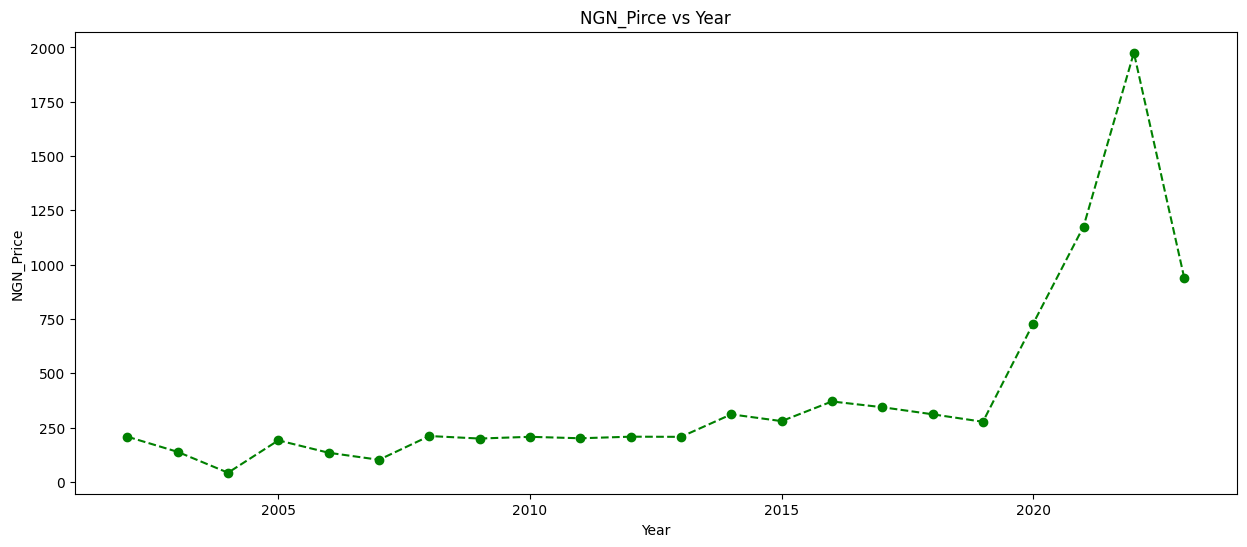

In [18]:
### Group the Price by year and ploting the graphs
yearly_price=pd.DataFrame(df.groupby('year')['NGN_Price'].mean())
yearly_price=yearly_price.reset_index()

## Intilizing the figsize
plt.figure(figsize=(15,6))
plt.plot(yearly_price['year'],yearly_price['NGN_Price'],linestyle='--', marker='o', color='g', label='line with marker')
plt.xlabel("Year")
plt.ylabel("NGN_Price")
plt.title("NGN_Pirce vs Year")
plt.show()


In [ ]:
### Group the inflation by year and ploting the graphs
yearly_inf=pd.DataFrame(df.groupby('year')['Inflation'].mean())
yearly_inf=yearly_inf.reset_index()

In [ ]:
yearly_inf

,year,Inflation
0,2002,12.876579
1,2003,14.031784
2,2004,14.998034
3,2005,17.863493
4,2006,8.225222
5,2007,5.388008
6,2008,11.581075
7,2009,12.537828
8,2010,13.740052
9,2011,10.826137


In [ ]:
df.head(2)

,date,State,Local_Government,Market_Name,latitude,longitude,category,commodity,unit,priceflag,pricetype,NGN_Price,usdprice,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,1KG,actual,Wholesale,175.92,1.5525,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,1KG,actual,Wholesale,150.18,1.3254,2002,January,Dry Season,12.876579


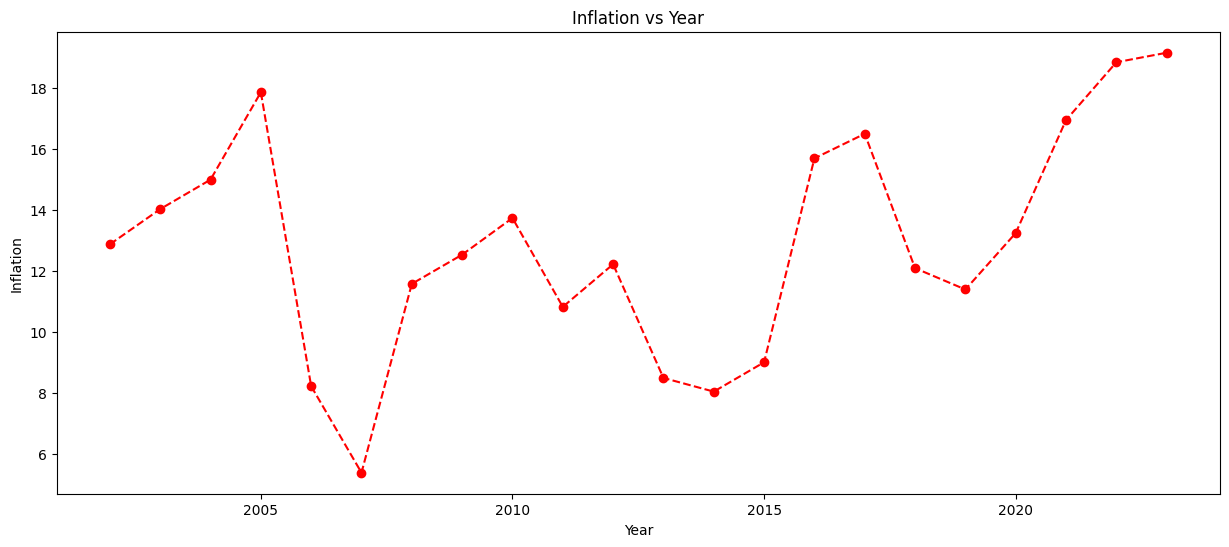

In [ ]:
### Plot inflation by year

## Intilizing the figsize
plt.figure(figsize=(15,6))

plt.plot(yearly_inf['year'],yearly_inf['Inflation'],linestyle='--', marker='o', color='r', label='line with marker')
plt.xlabel("Year")
plt.ylabel("Inflation")
plt.title("Inflation vs Year")
plt.show()


In [ ]:
## Find the relationship b/w the Categorical variables and Price
df=data.copy()
cat_feature= [ feature for feature in df.columns if df[feature].dtypes=='O']

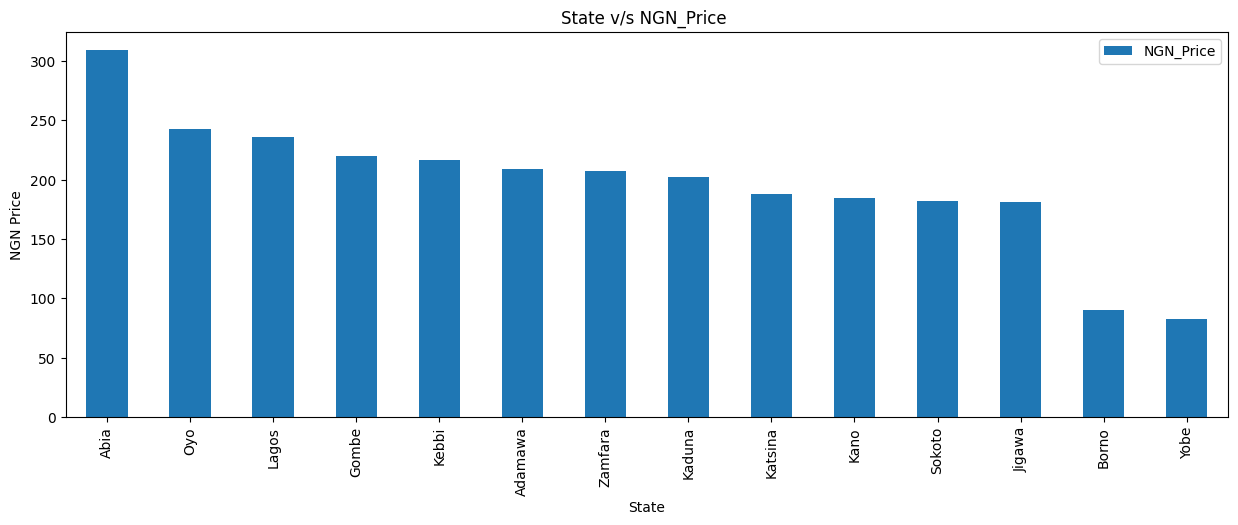

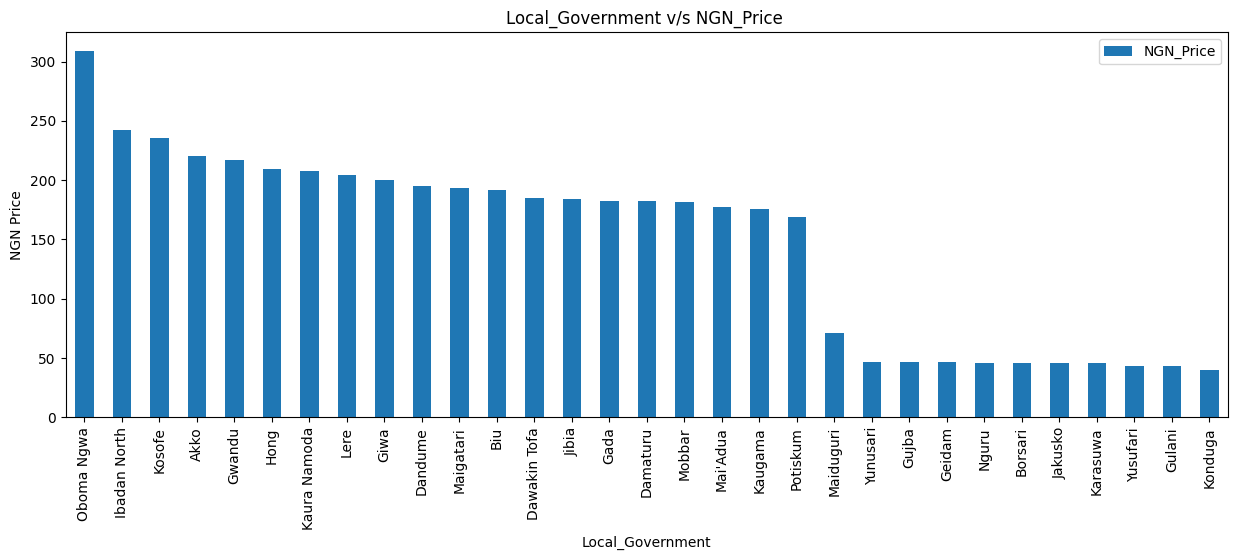

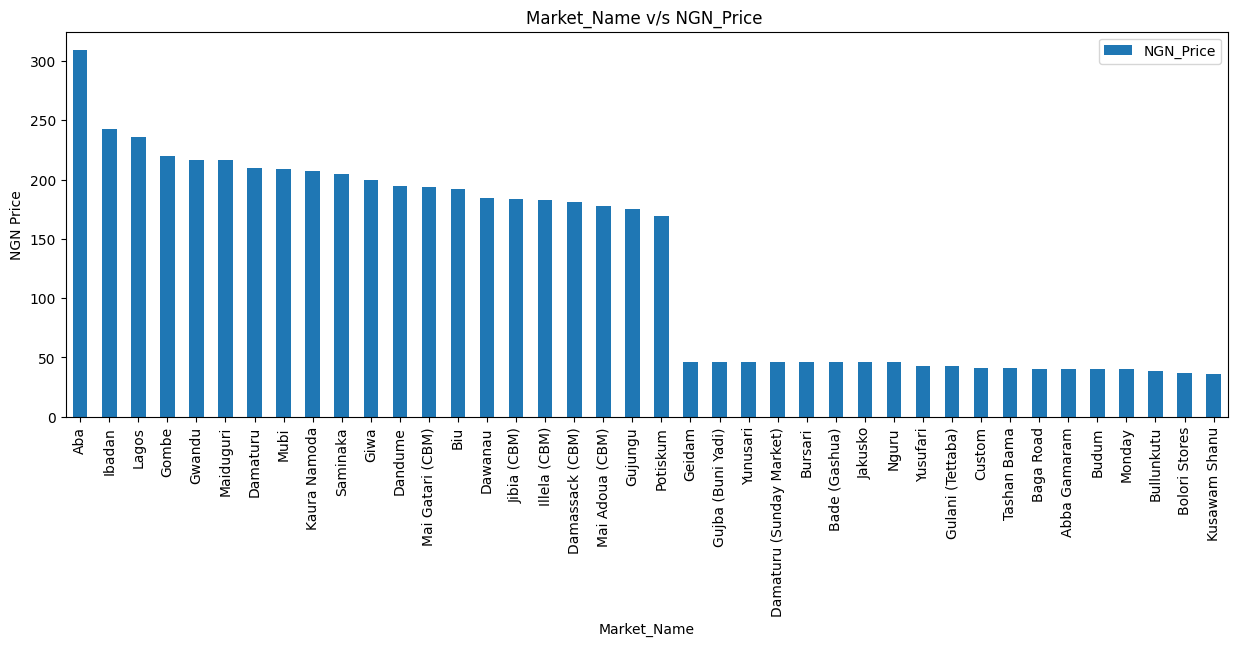

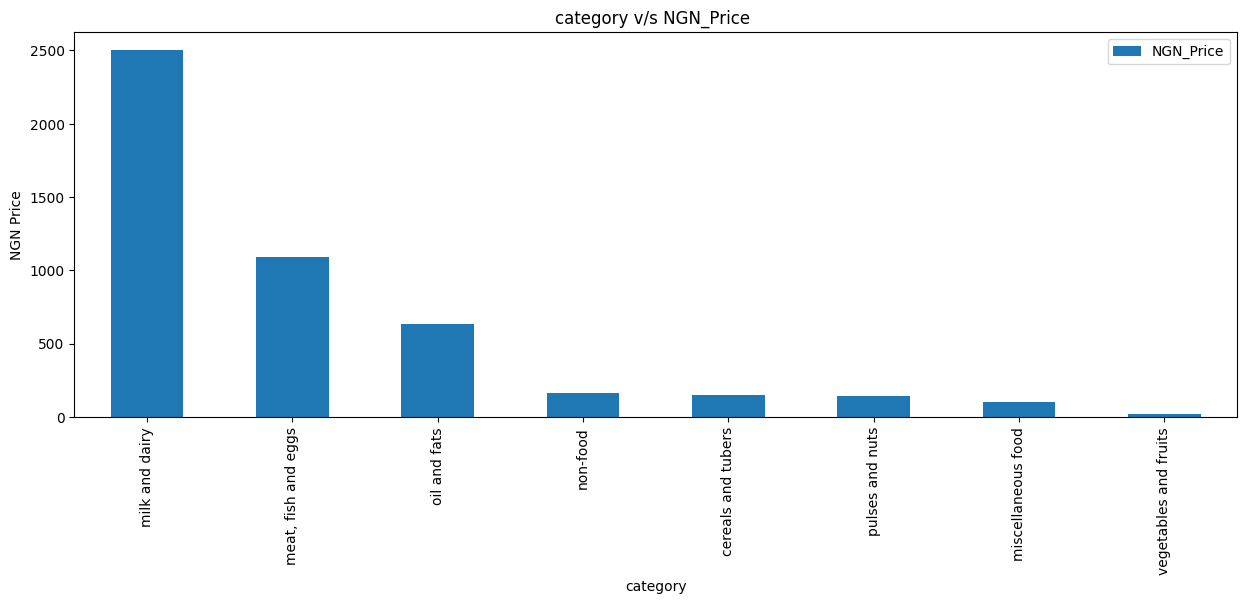

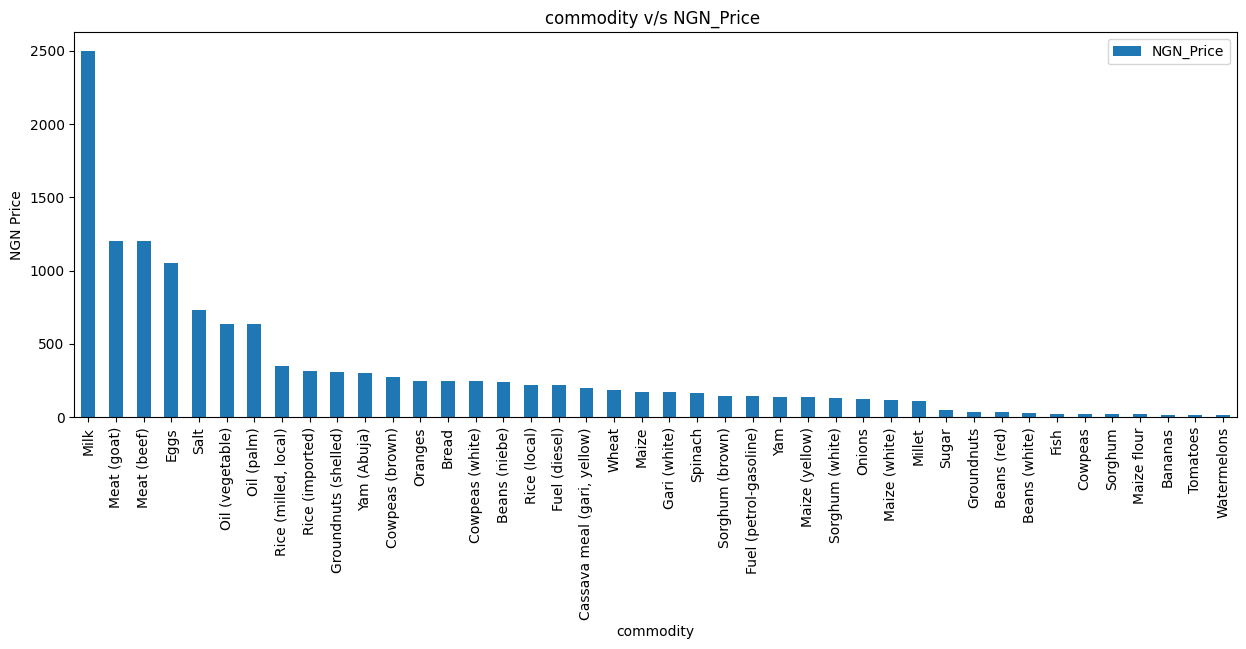

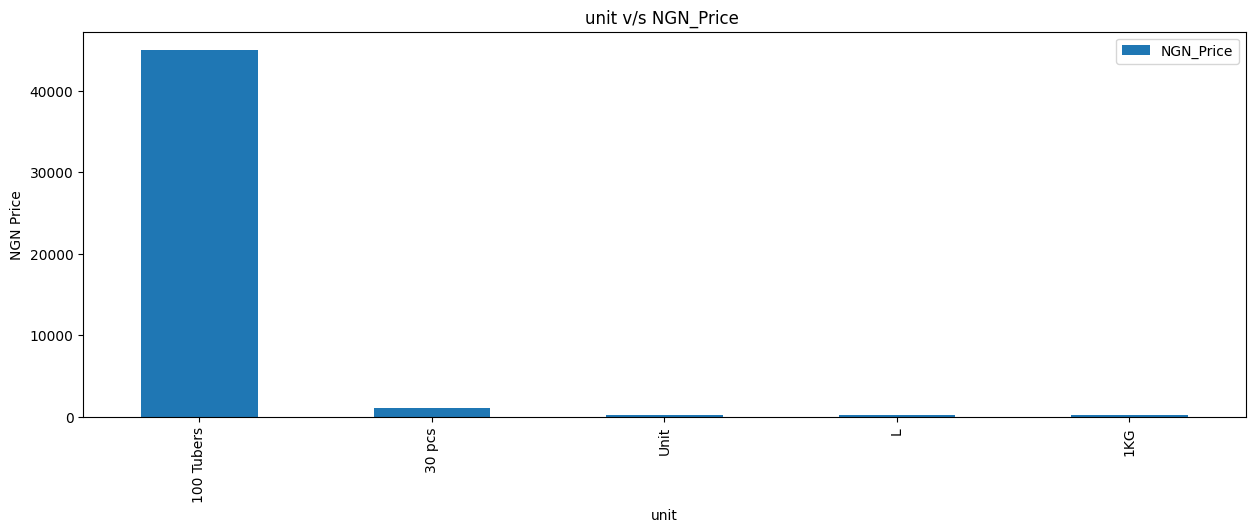

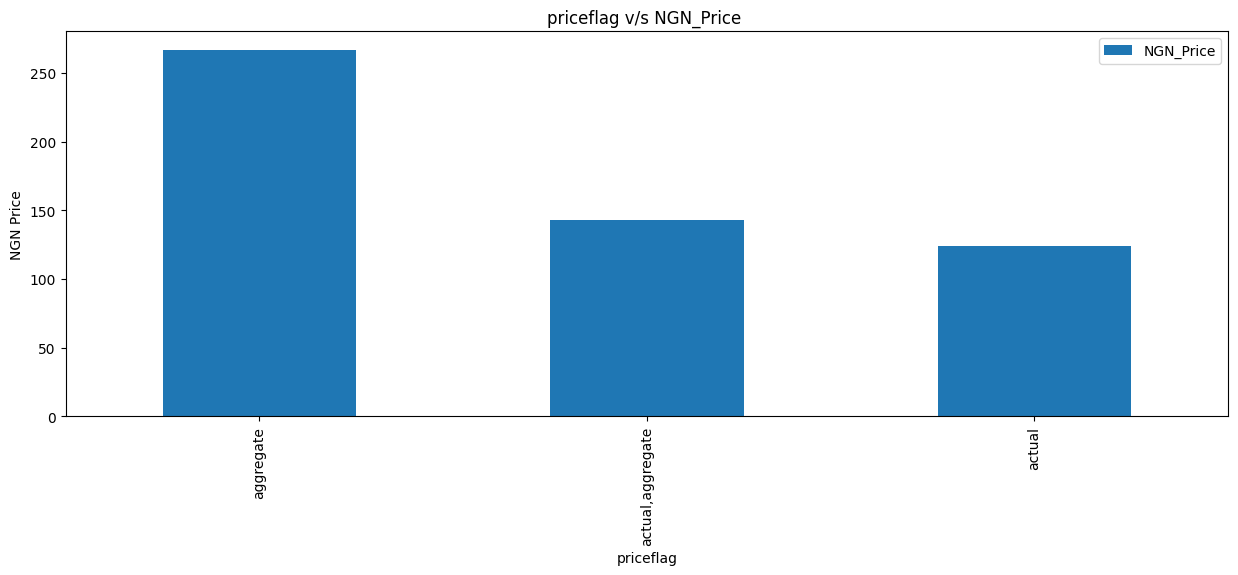

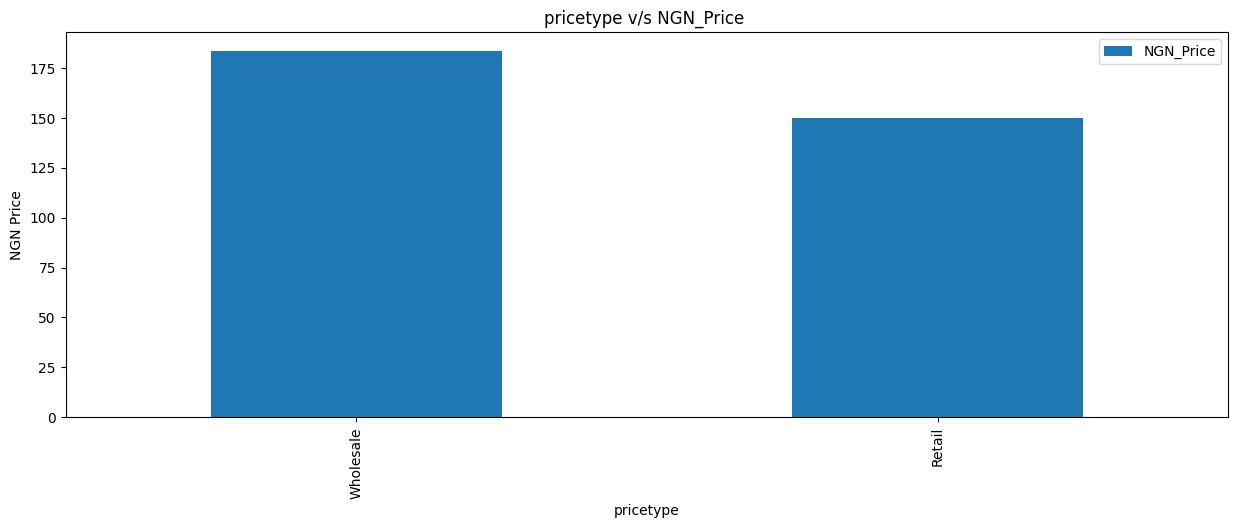

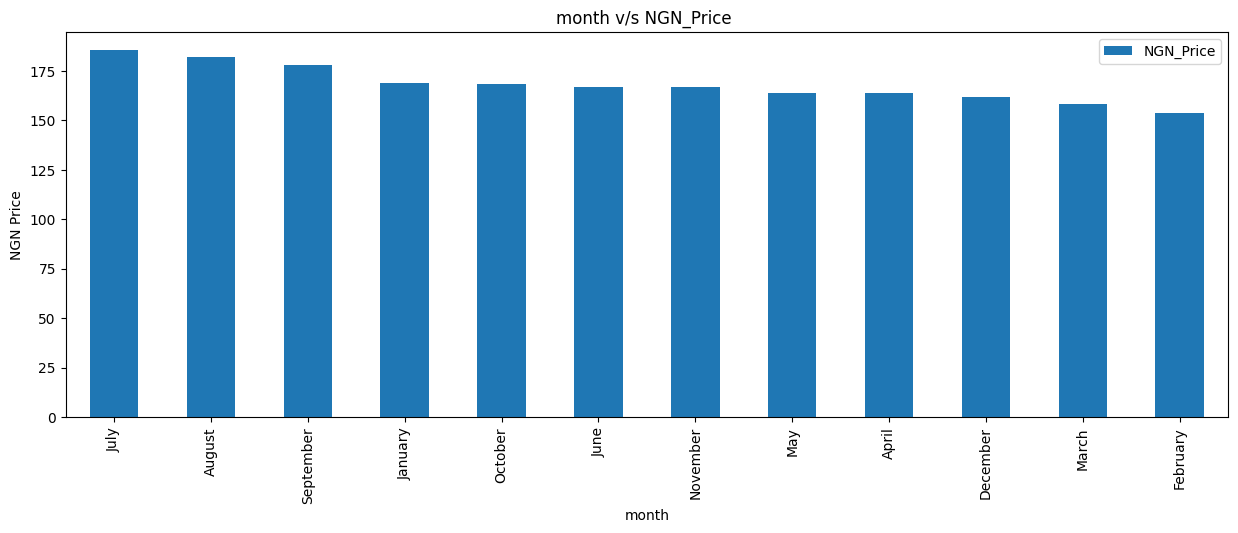

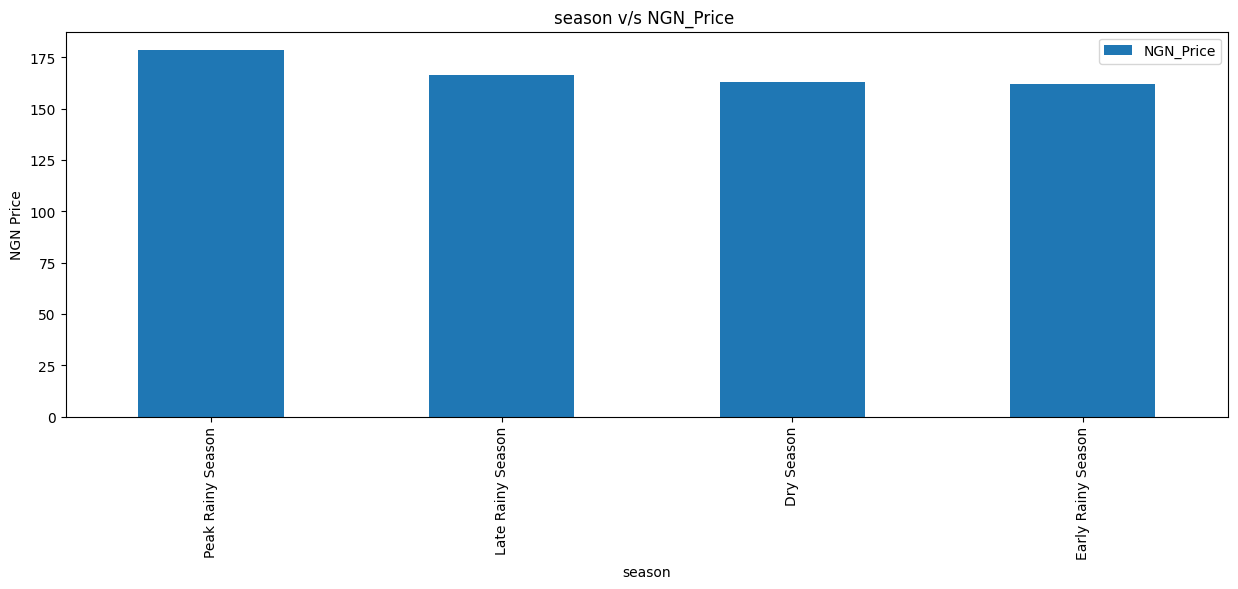

In [ ]:
for feature in cat_feature:
  pd.DataFrame(df.groupby(feature)['NGN_Price'].median()).sort_values(by='NGN_Price',ascending=False).plot.bar(figsize=(15,5))
  plt.title(f"{feature} v/s NGN_Price ")
  plt.xlabel(feature)
  plt.ylabel("NGN Price")
  plt.show()

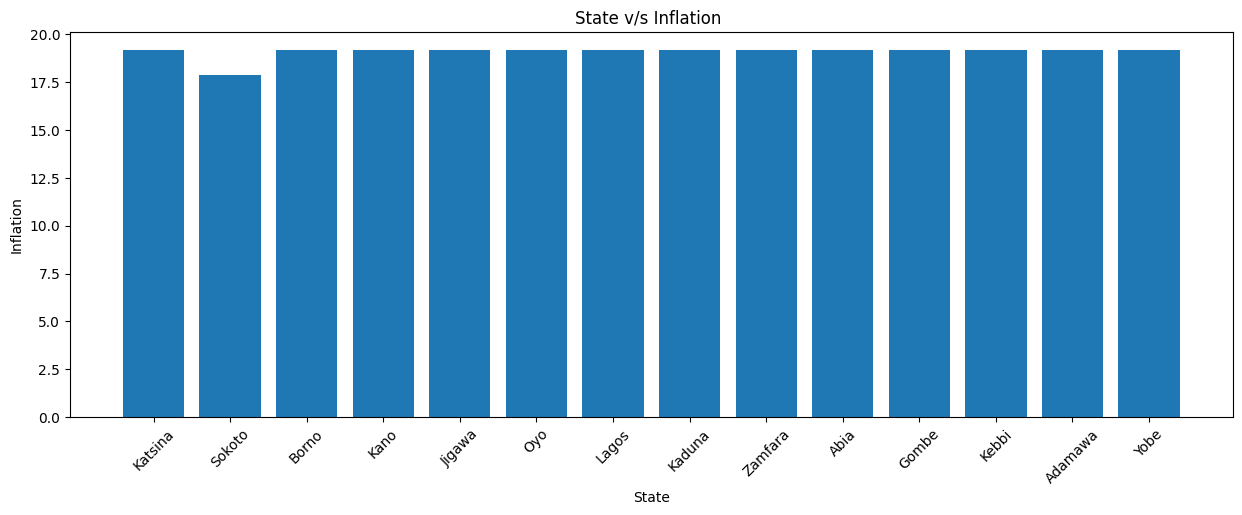

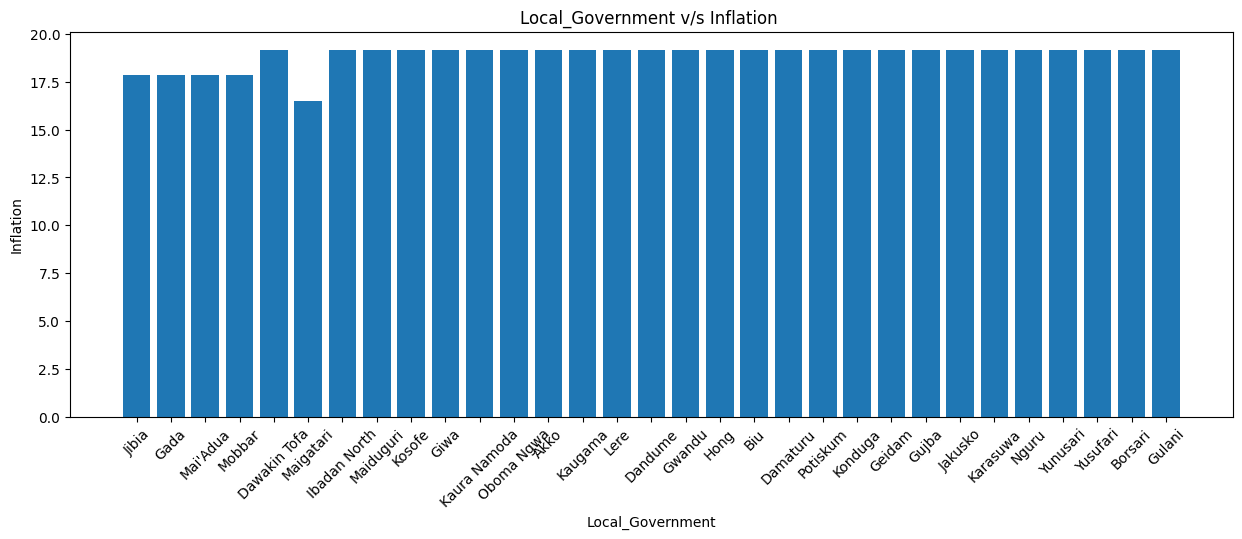

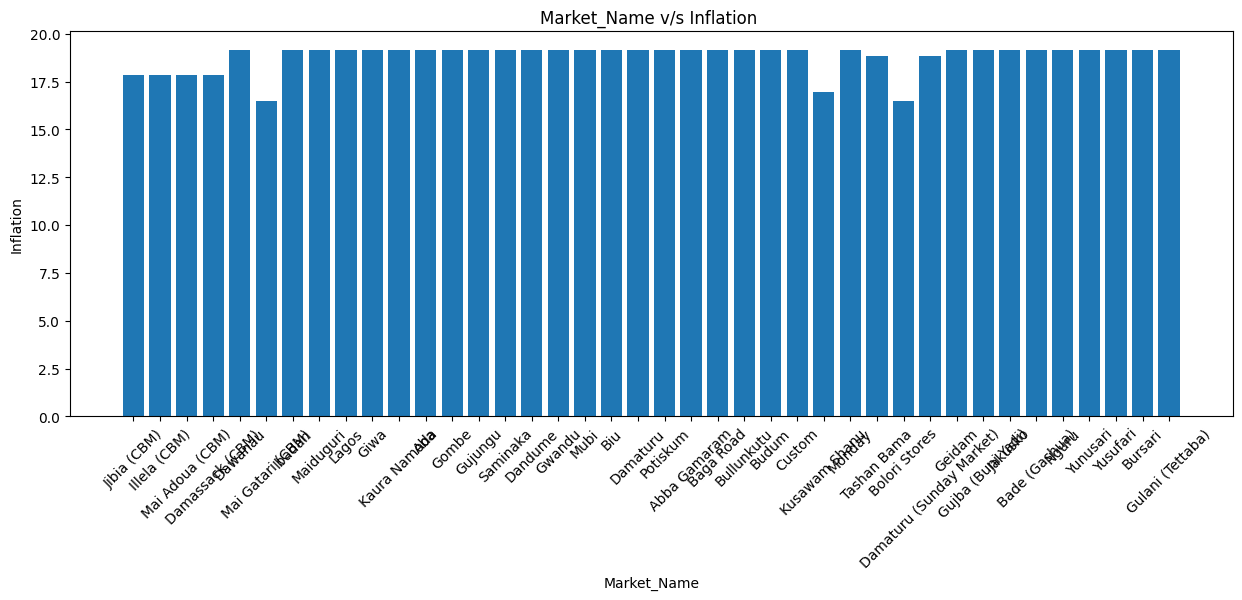

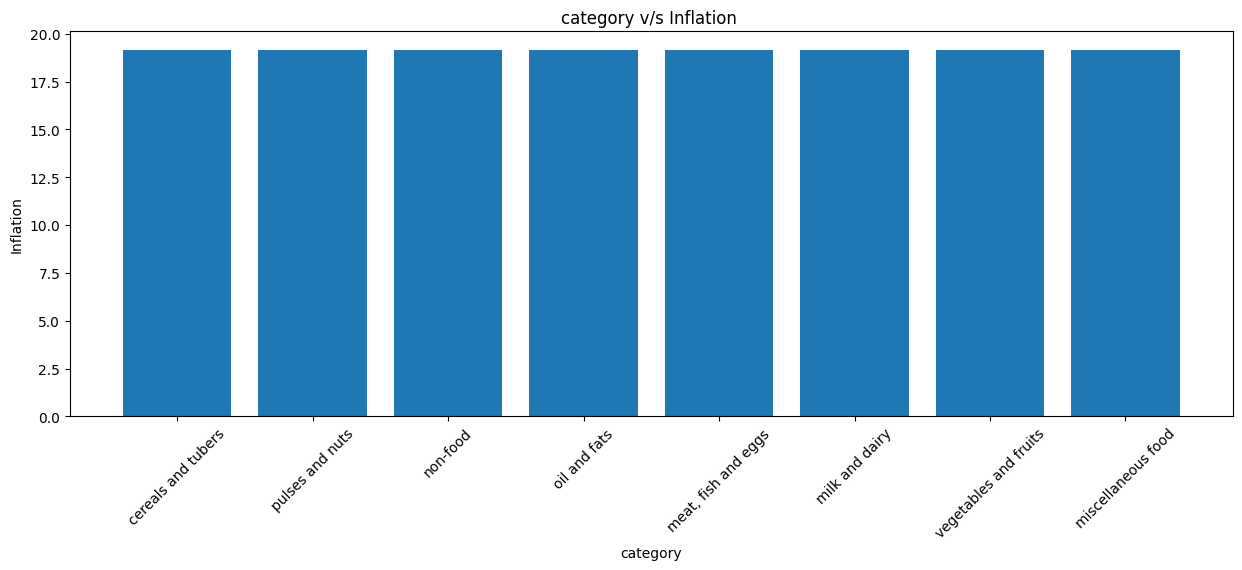

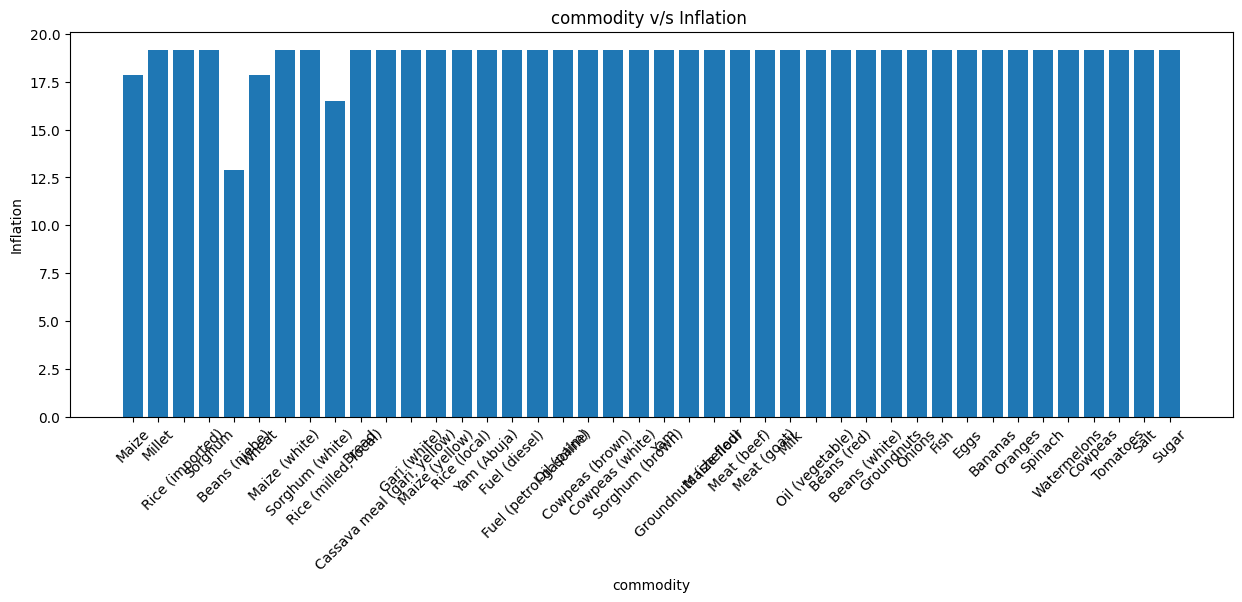

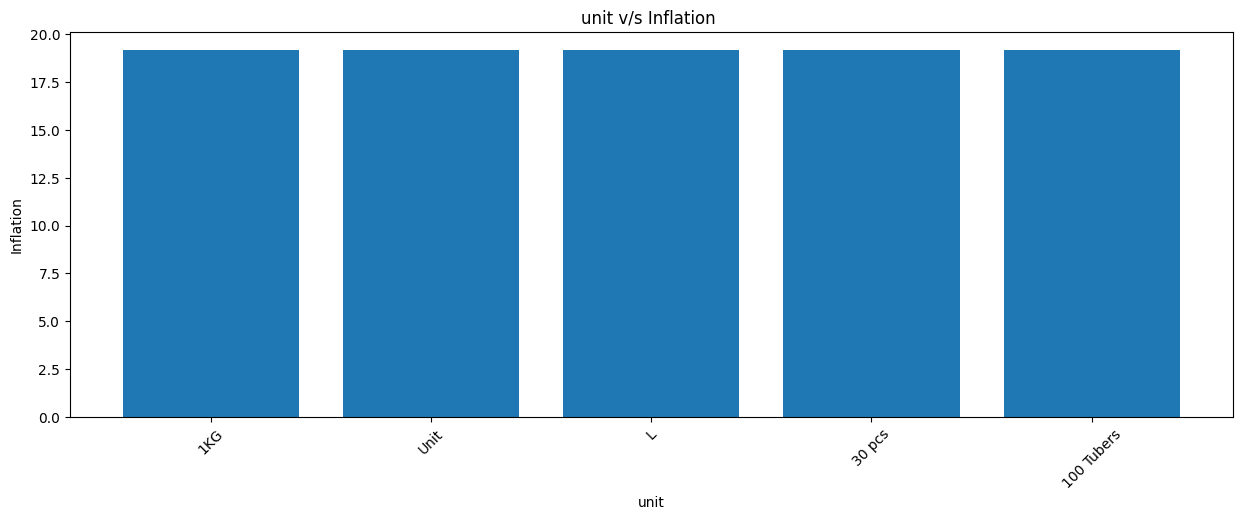

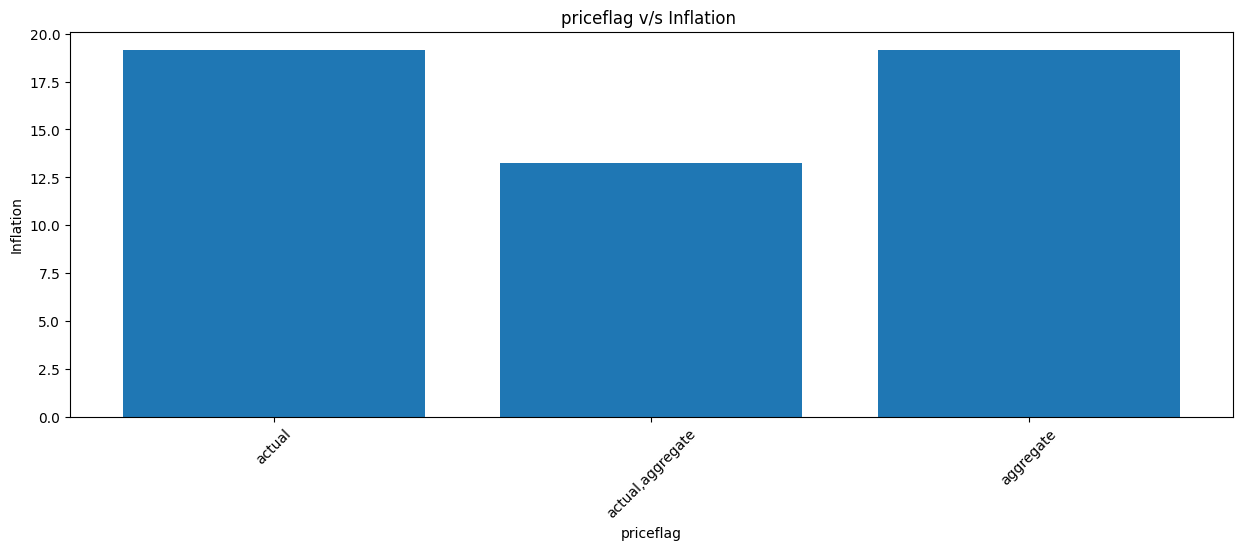

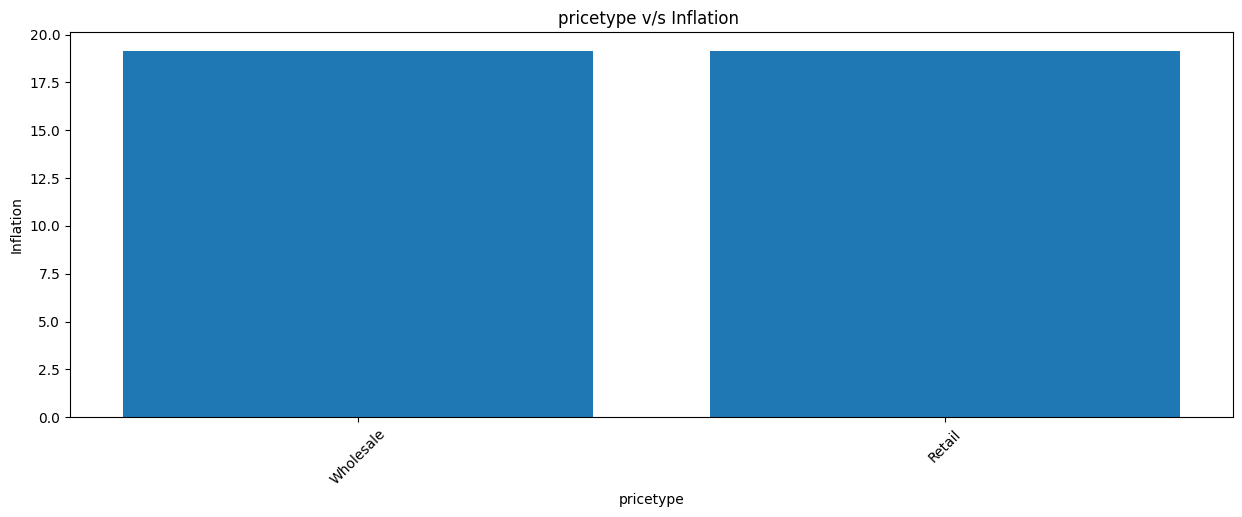

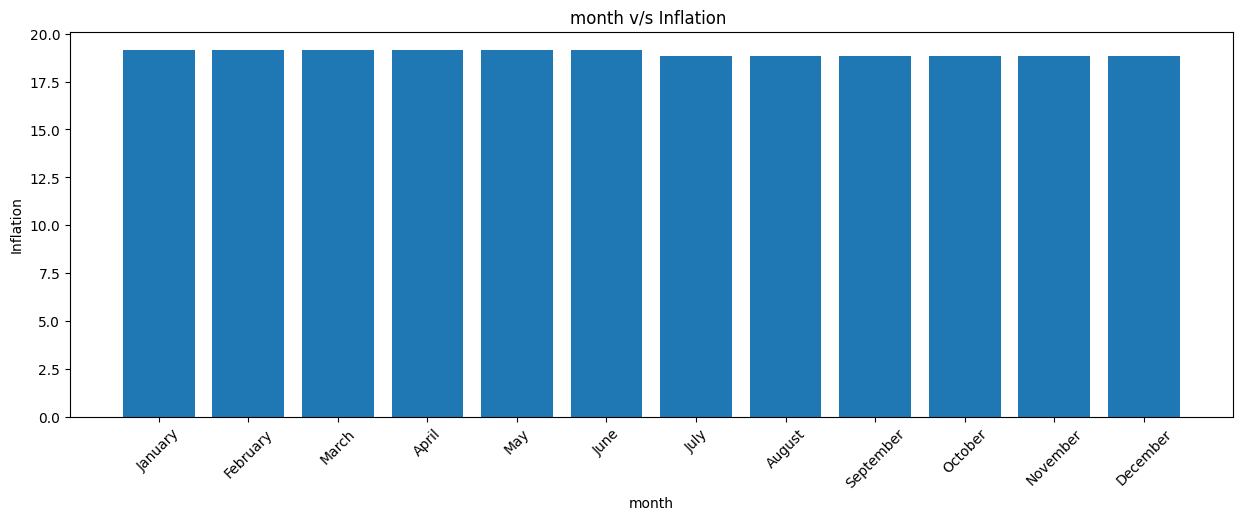

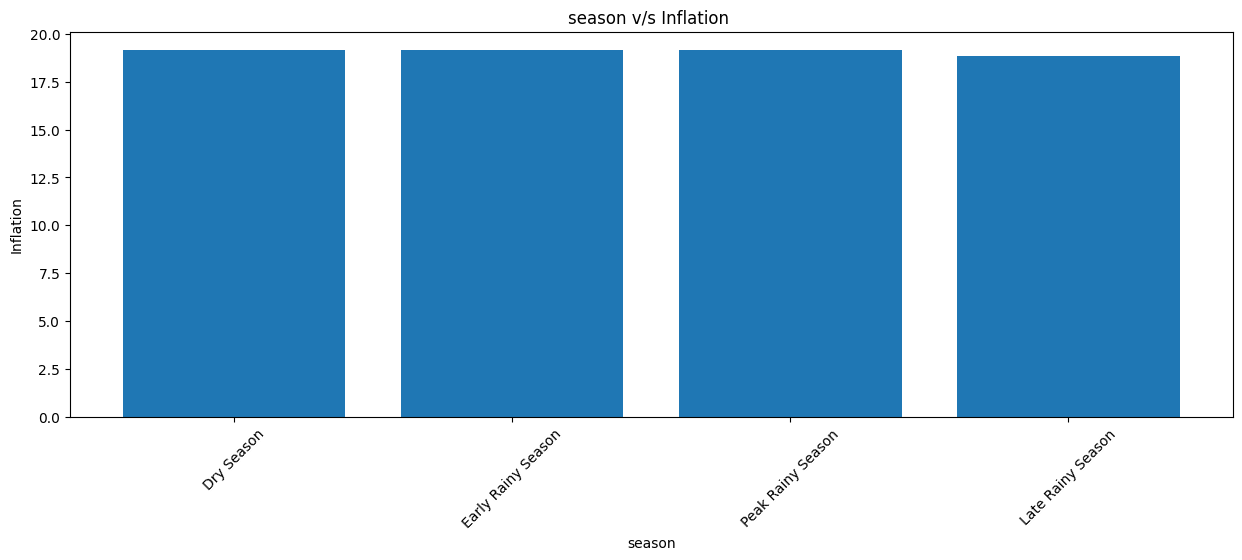

In [ ]:
### Categorical feature vs Inflation
for feature in cat_feature:
  pd.DataFrame(df.groupby(feature)['Inflation'].median()).sort_values(by='Inflation',ascending=False)
  plt.figure(figsize=(15,5))
  plt.bar(df[feature],df['Inflation'])
  plt.title(f"{feature} v/s Inflation ")
  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.ylabel("Inflation")
  plt.show()

<Axes: xlabel='NGN_Price', ylabel='Count'>

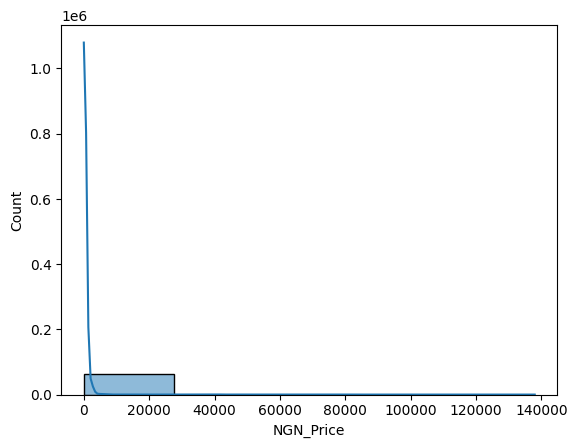

In [ ]:
#### Histrogram of the NGN_Price
sns.histplot(df['NGN_Price'],kde=True,bins=5)


Price didnot fllow the normal distribution

<Axes: xlabel='Inflation', ylabel='Count'>

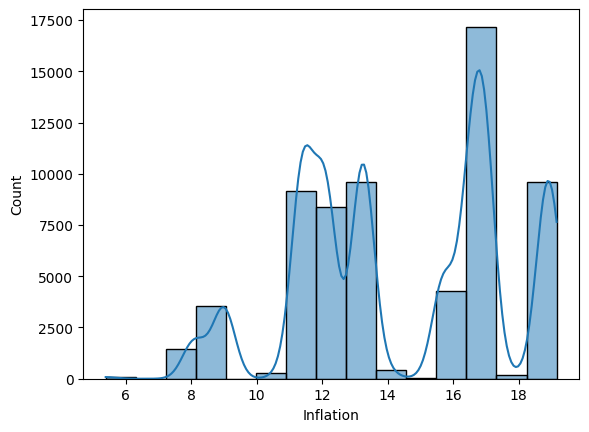

In [ ]:
#### Histrogram of the Inflation
sns.histplot(df['Inflation'],kde=True,bins=15)


Inflation did not follow the Normal distribution curve


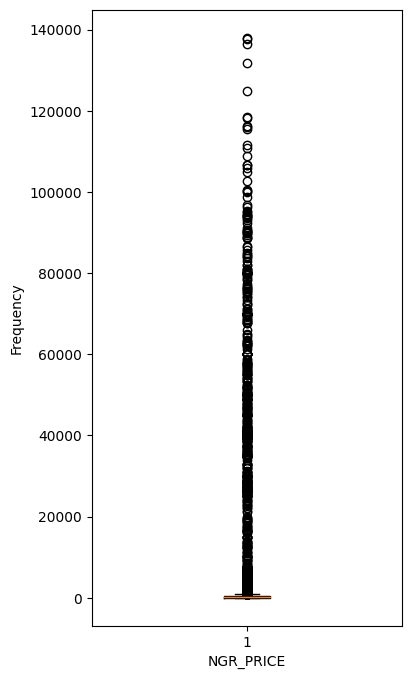

In [ ]:
### Checking the outliers in Price
plt.figure(figsize=(4,8))
plt.boxplot(df['NGN_Price'])
plt.xlabel('NGR_PRICE')
plt.ylabel('Frequency')
plt.show()

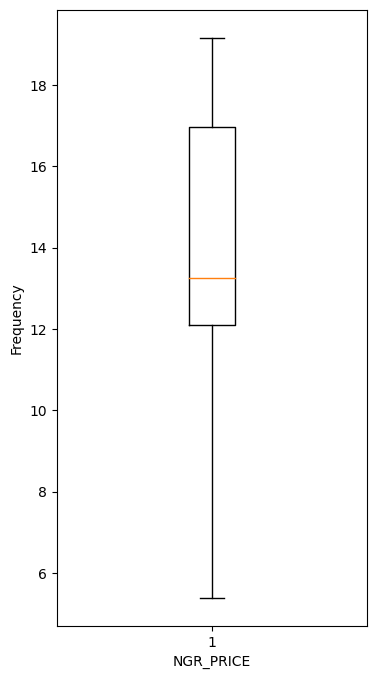

In [ ]:
### Checking the outliers in Inflations
plt.figure(figsize=(4,8))
plt.boxplot(df['Inflation'])
plt.xlabel('NGR_PRICE')
plt.ylabel('Frequency')
plt.show()

There are no outliers in the inflation

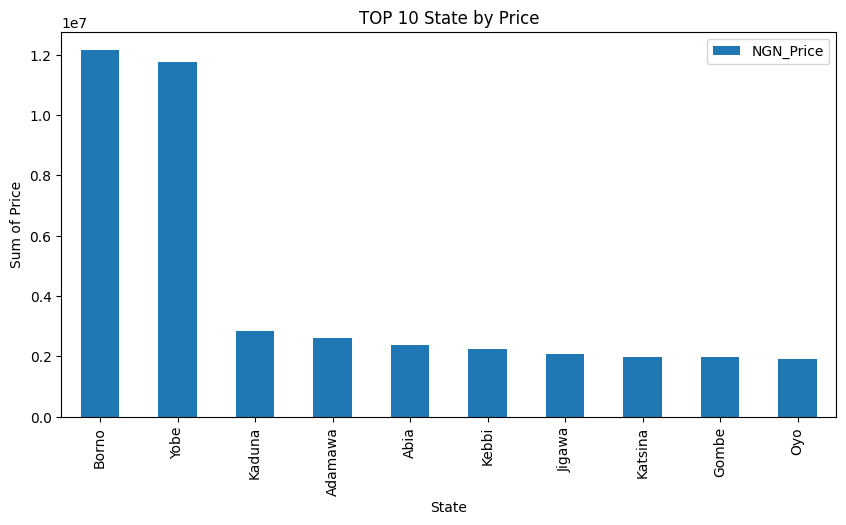

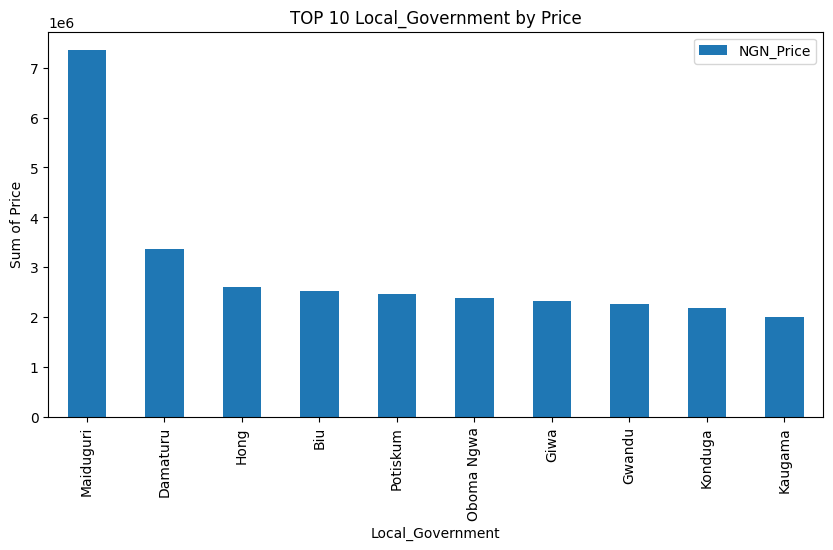

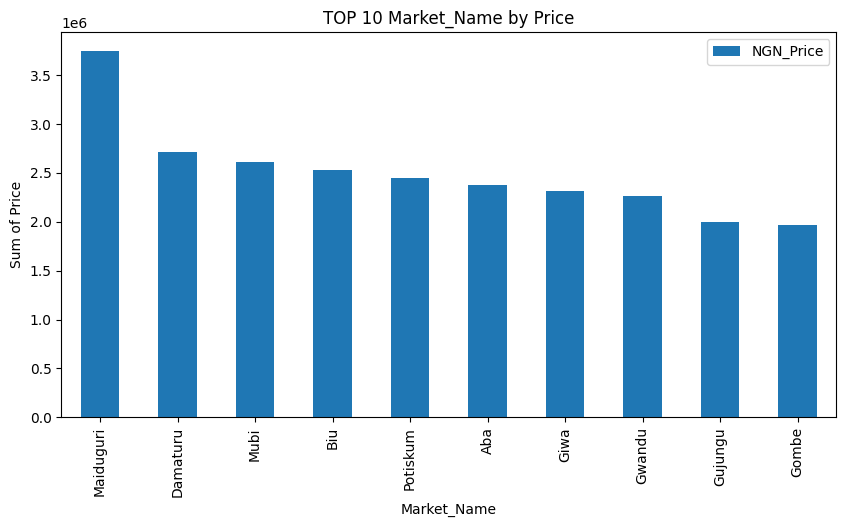

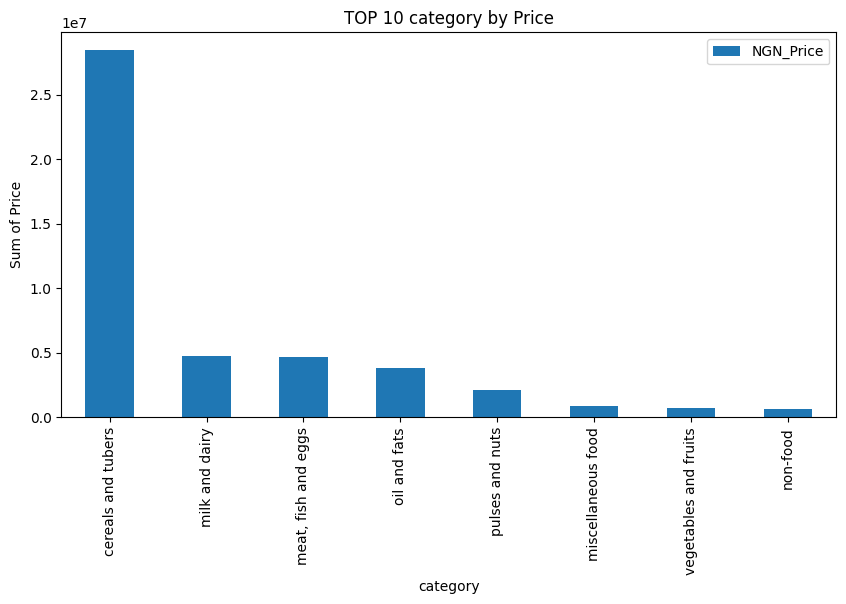

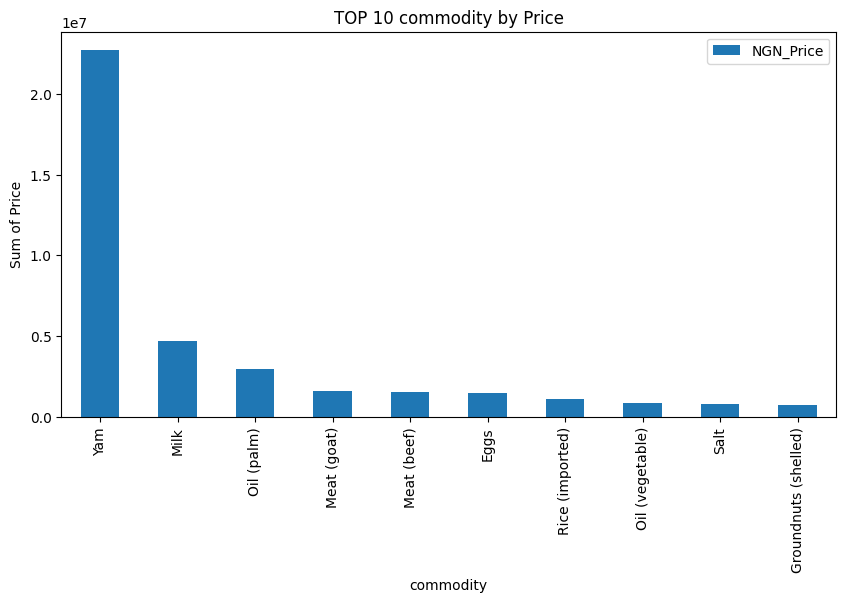

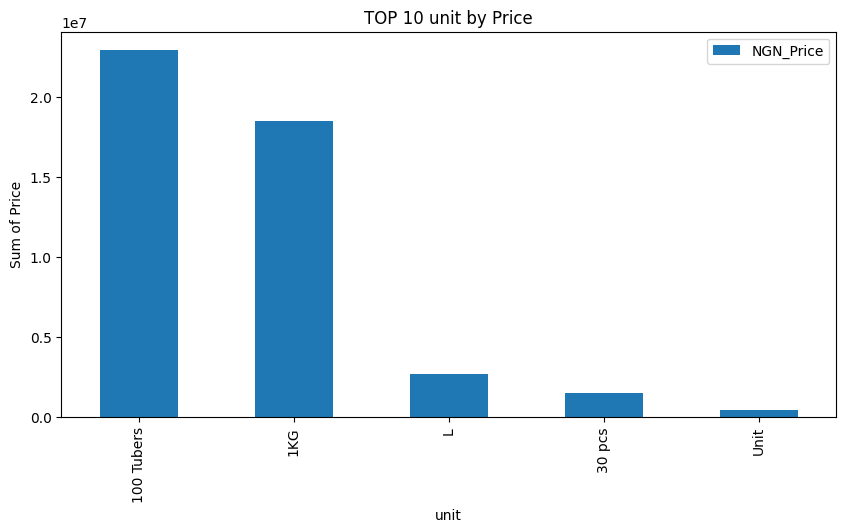

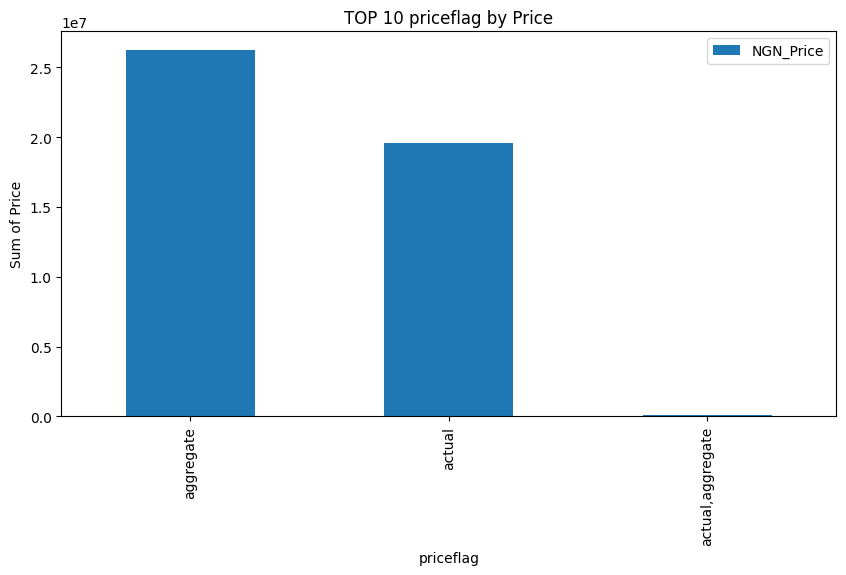

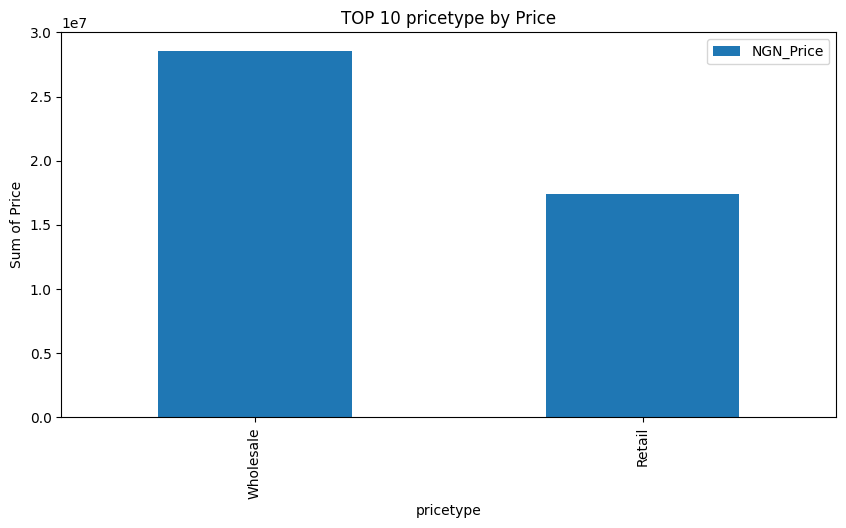

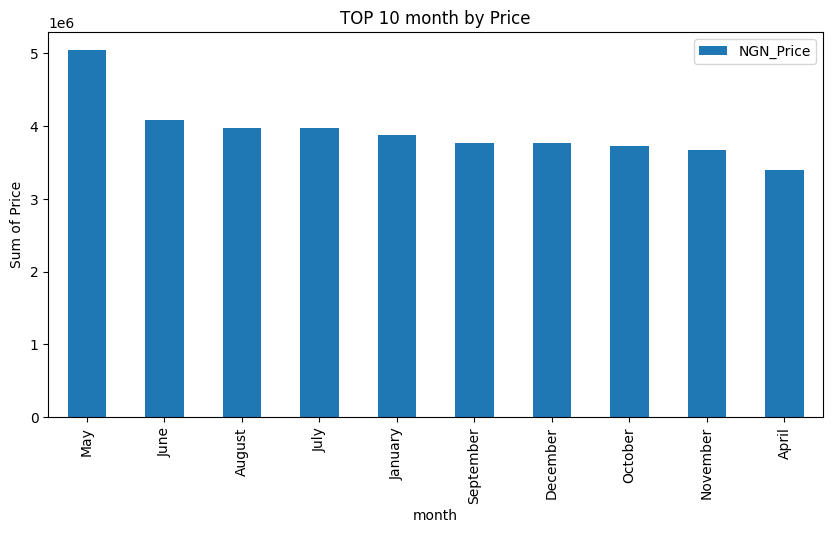

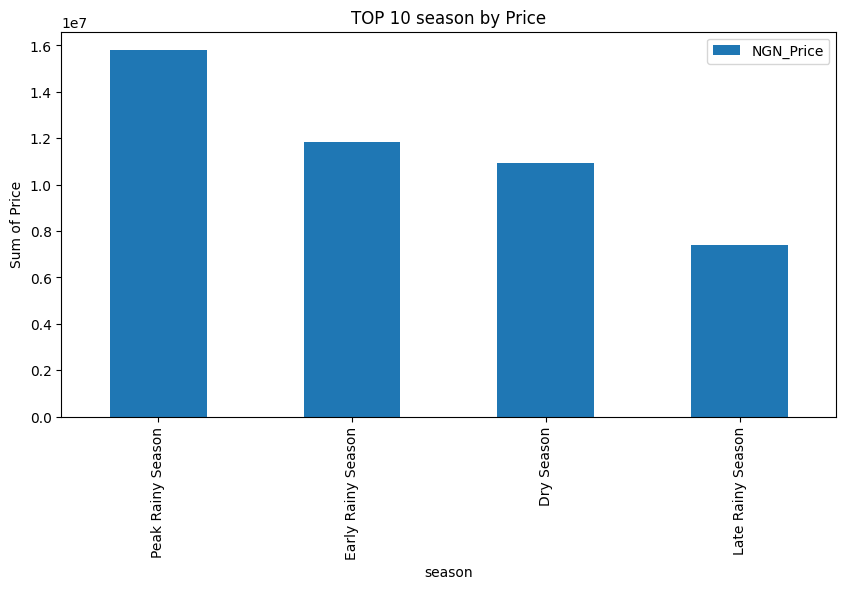

In [ ]:
#Categorical Feature by its Top 10 Values by Price Sum

for feature in cat_feature:
  pd.DataFrame(df.groupby(feature)['NGN_Price'].sum()).sort_values(by='NGN_Price',ascending=False).head(10).plot(kind='bar',figsize=(10,5))
  plt.title(f"TOP 10 {feature} by Price")
  plt.xlabel(feature)
  plt.ylabel('Sum of Price')
  plt.show()

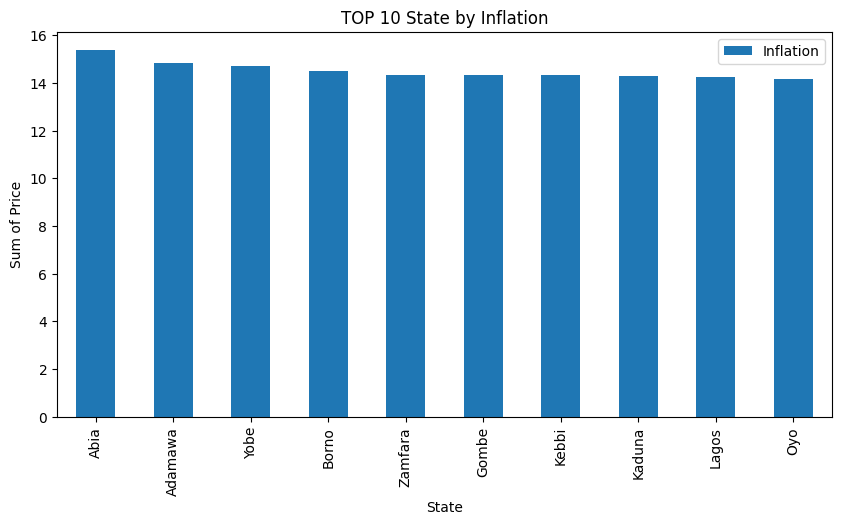

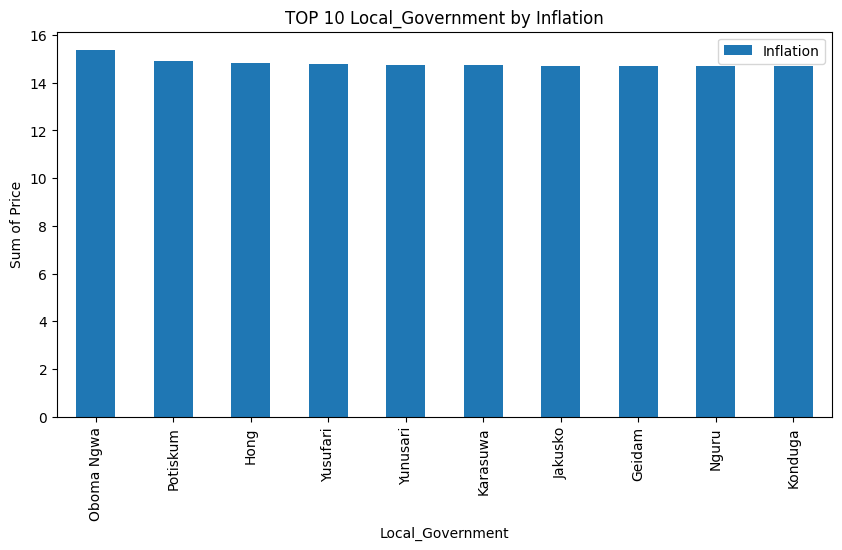

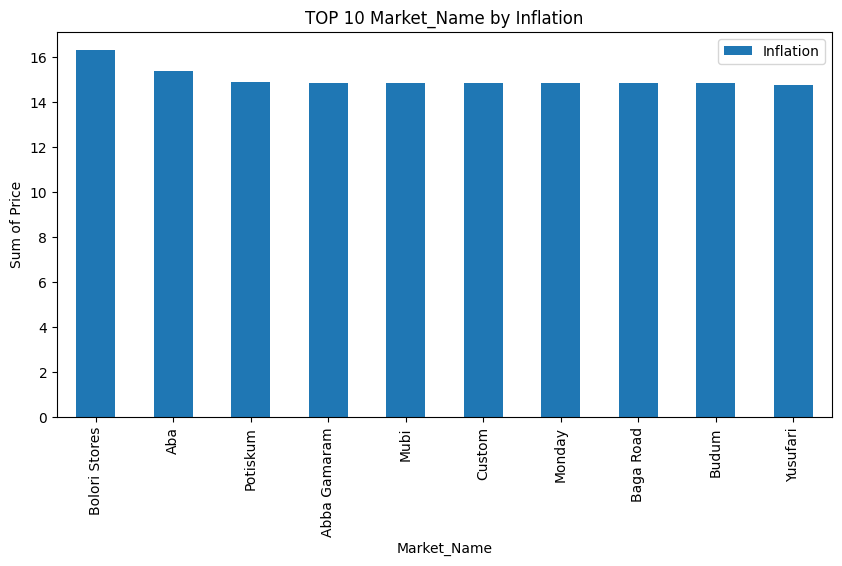

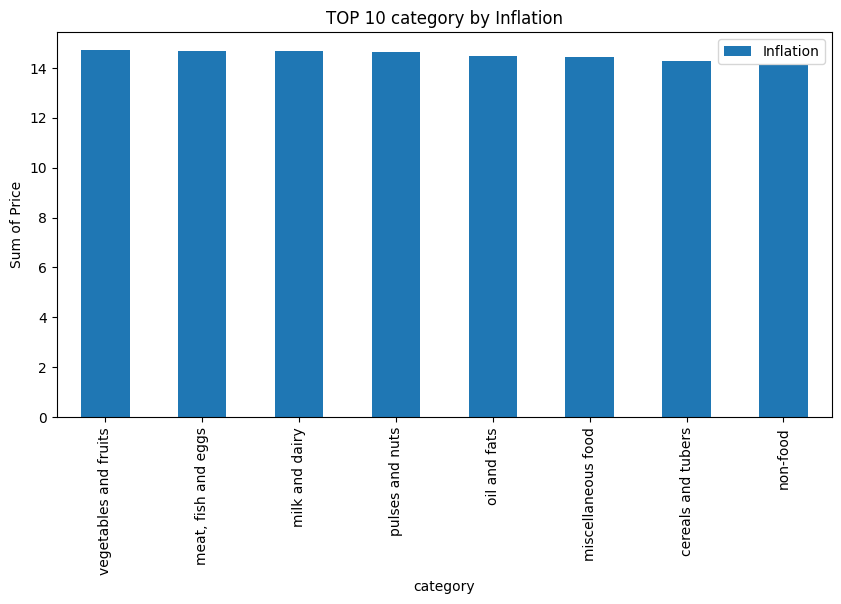

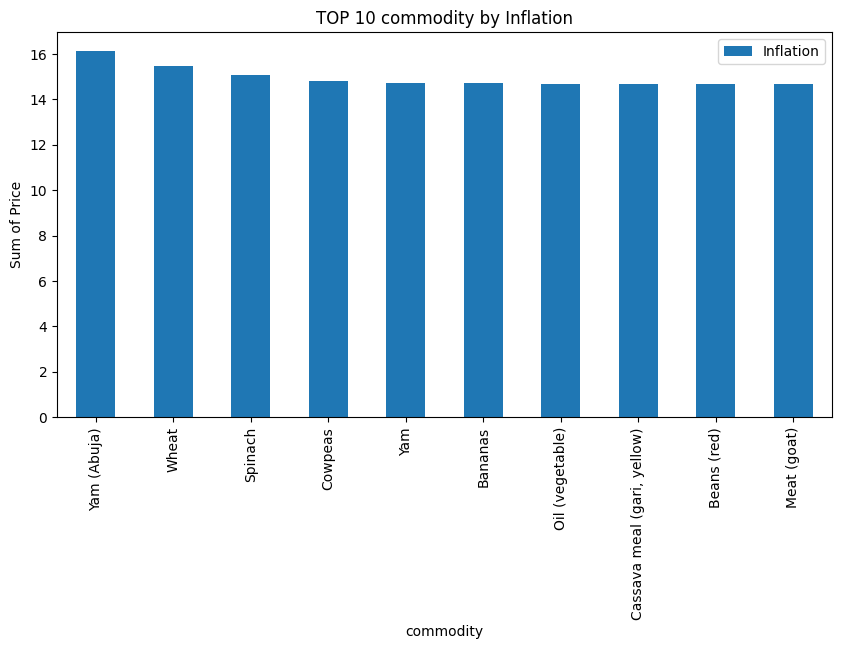

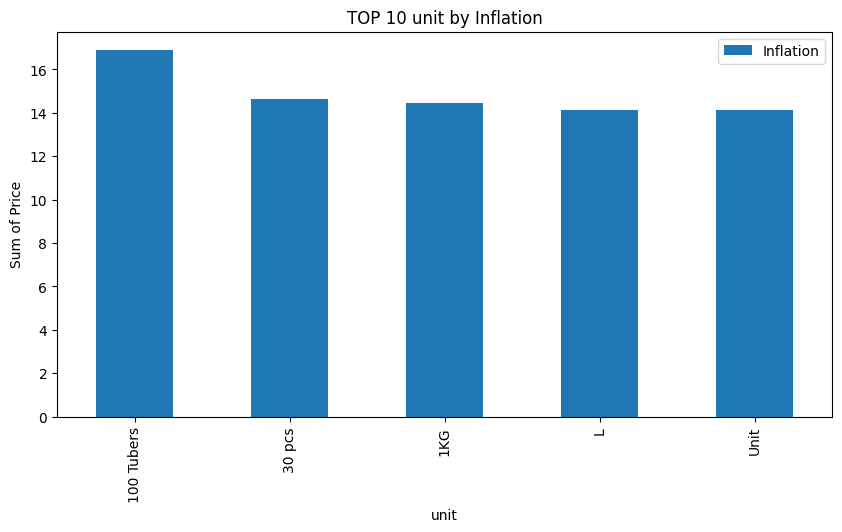

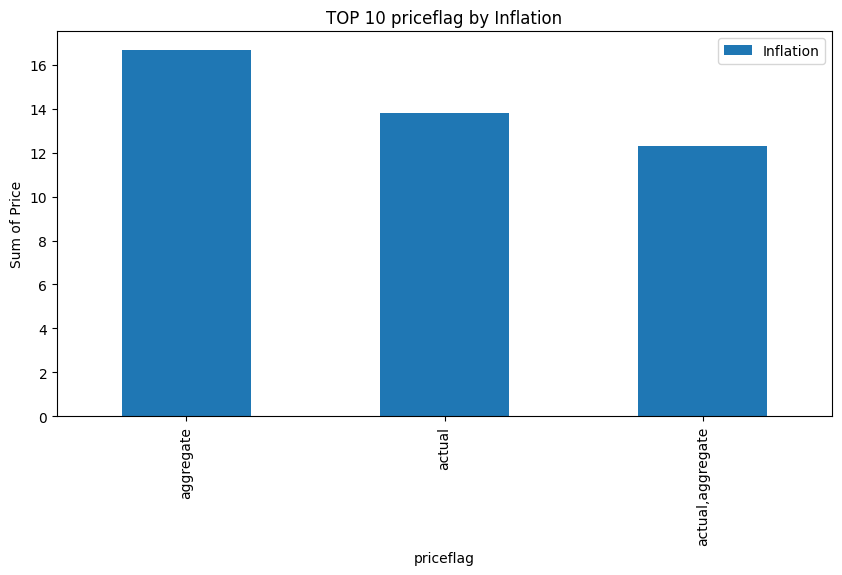

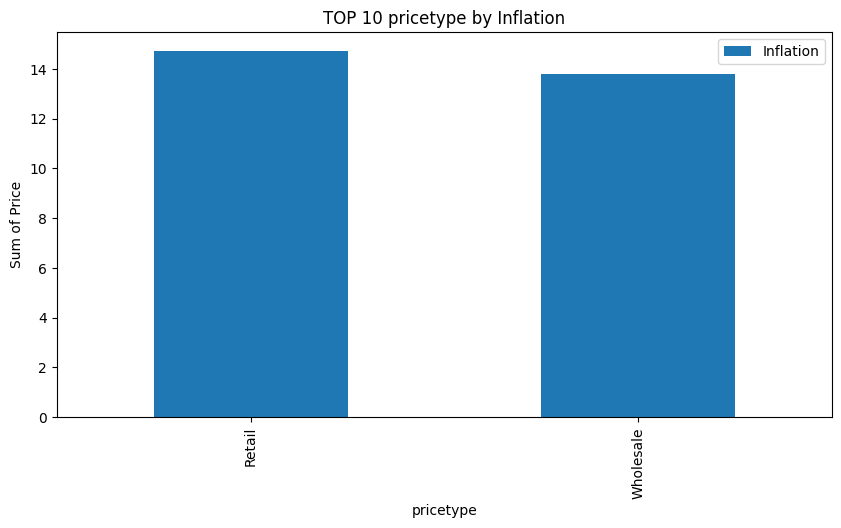

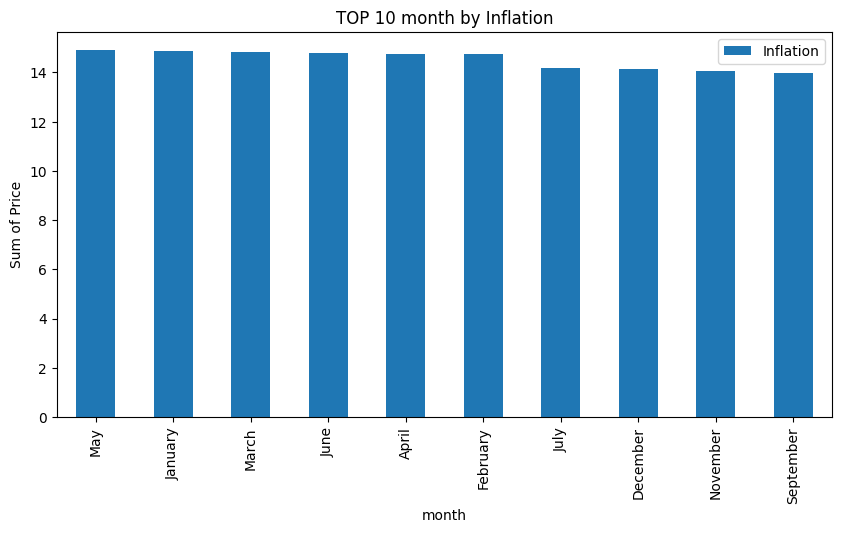

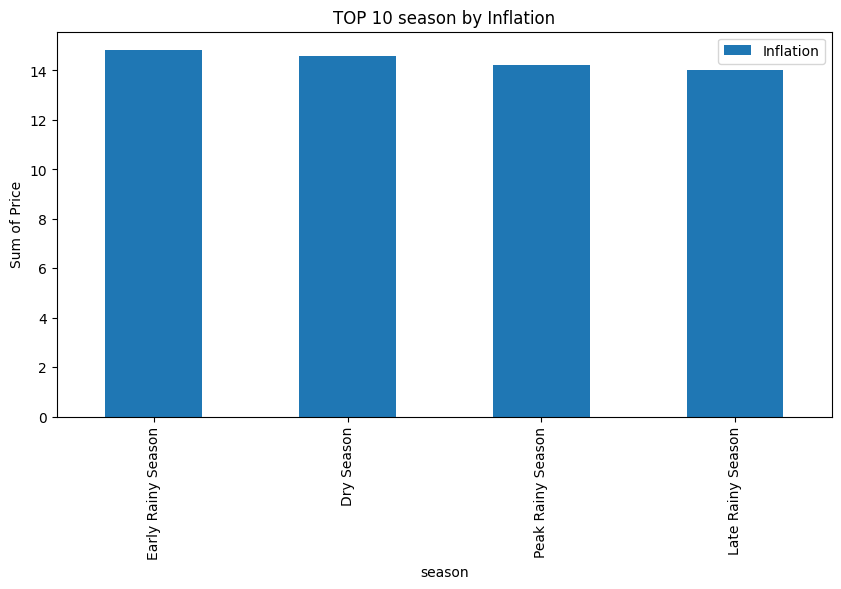

In [ ]:
#Categorical Feature by its Top 10 Values by Inflation aveage

for feature in cat_feature:
  pd.DataFrame(df.groupby(feature)['Inflation'].mean()).sort_values(by='Inflation',ascending=False).head(10).plot(kind='bar',figsize=(10,5))
  plt.title(f"TOP 10 {feature} by Inflation")
  plt.xlabel(feature)
  plt.ylabel('Sum of Price')
  plt.show()

In [ ]:
df.head(2)

,date,State,Local_Government,Market_Name,latitude,longitude,category,commodity,unit,priceflag,pricetype,NGN_Price,usdprice,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,1KG,actual,Wholesale,175.92,1.5525,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,1KG,actual,Wholesale,150.18,1.3254,2002,January,Dry Season,12.876579


**Conclusion**
1. There are no null values in the data
2. There are outlier in the NGN_PRICE feature identified by the Box plot
3. There are significant relation b/w Inflation and Year,NGN_PRICE and Year
4. Inflation and Price feature didnot folow the Normal distribution.
5. There are no much inference of State, Local Gov, Market on inflation hence it is almost same.



In [19]:
data.head(2)

,date,State,Local_Government,Market_Name,latitude,longitude,category,commodity,unit,priceflag,pricetype,NGN_Price,usdprice,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,1KG,actual,Wholesale,175.92,1.5525,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,1KG,actual,Wholesale,150.18,1.3254,2002,January,Dry Season,12.876579


#  Featuring Engineering

I am dropping the usdprice , priceflag from the data, because for the EDA it is significantly established that
there are no relation b/w price and these columns.

In [141]:
data.drop(columns=['usdprice','priceflag'],inplace=True)

In [142]:
unique_data=data.drop_duplicates(subset=['State','latitude','longitude'])
unique_data=unique_data[['State','latitude','longitude']]

In [143]:
unique_data.sort_values(by=['State'])

,State,latitude,longitude
2531,Abia,5.147640,7.356720
3774,Adamawa,10.267610,13.264360
8253,Borno,11.850710,13.171242
3788,Borno,10.611100,12.195000
8224,Borno,11.829812,13.092646
8239,Borno,11.849734,13.163442
8210,Borno,11.867950,13.123314
8267,Borno,11.858887,13.175996
8196,Borno,11.858182,13.154892
8297,Borno,11.834551,13.152417


State columns and latitude,longitude have almost one to one relation hence I am droping the latitude and longitude columns .

In [144]:
data.drop(columns=['latitude',	'longitude'],inplace=True)

In [145]:
data['unit'].value_counts()

1KG           56982
L              4115
Unit           1464
30 pcs         1211
100 Tubers      449
Name: unit, dtype: int64

In [146]:
data[['commodity','unit']].value_counts().sort_index()

commodity                    unit      
Bananas                      1KG           1166
Beans (niebe)                1KG             20
Beans (red)                  1KG           1216
Beans (white)                1KG           1226
Bread                        Unit          1464
Cassava meal (gari, yellow)  1KG           1772
Cowpeas                      1KG            956
Cowpeas (brown)              1KG           1929
Cowpeas (white)              1KG           2074
Eggs                         30 pcs        1211
Fish                         1KG           1209
Fuel (diesel)                L             1384
Fuel (petrol-gasoline)       L             1371
Gari (white)                 1KG           2019
Groundnuts                   1KG           1232
Groundnuts (shelled)         1KG           2040
Maize                        1KG            561
Maize (white)                1KG           2330
Maize (yellow)               1KG           1977
Maize flour                  1KG           1236


It is very clear that all the unit in 1 kg except.
1. Bread - Unit
2. Fuel(Diesel) - L(liter)
3. Fuel(Petrol gasoline)- L (liter)
4. Oil (Plam)- L ( liter) and KG
5. Yam - Tubers

I will remove the unit columns as it is not important feature as all the data poitns are unit (1 KG ) and which are not will convert it to equivelent to 1 kg
1. For Bread unit is Unit which is equivelent to 1 kg hence i will keep as it is.
2. Fuel are in liter , will convert into kg by multiplying by mass density
4. oil (Plam ) are in KG and L , i will drop the datapoitns which are in L
5 Yam - Tubers , I will consider 100 tubers as 1 kg hence if user get the
predicted price of YAM  from the Model will be in 100 tubers by default.


Converting the Diesel into KG from liter

  To convert liters of diesel to kilograms, you can use the following formula:



*  Kilograms of Diesel=Liters of Diesel×Density of Diesel



    1 Liter of Diesel into KG
*   KG of Diesel =  1 liter x 0.85KG/Liter = 0.85kg
    * convert the price of liter as per kg

    * 1 liter (0.85 kg) of Diesel price = x
    * 1 kg of Diesel price = x*1.1764




In [147]:
data.head(2)

,date,State,Local_Government,Market_Name,category,commodity,unit,pricetype,NGN_Price,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),cereals and tubers,Maize,1KG,Wholesale,175.92,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),cereals and tubers,Millet,1KG,Wholesale,150.18,2002,January,Dry Season,12.876579


In [148]:
 data.loc[(data['unit']=='L') &  (data['commodity']=='Fuel (diesel)'),'NGN_Price']= data['NGN_Price']*1.1764


Converting the Price columns where Fuel petrol is in L

1 LITER OF Petrol = 0.75kg / liter

* 1 liter (0.75 kg ) petrol price = x
* 1 kg of petrol = x*1.333



In [149]:
data.loc[(data['unit']=='L') &  (data['commodity']=='Fuel (petrol-gasoline)'),'NGN_Price']=data['NGN_Price']*1.333

In [150]:
### doing the sollow copy to save the any uneven change of data.
df=data.copy()

In [152]:
df.loc[df['commodity'].isin(['Fuel (petrol-gasoline)','Fuel (diesel)']),'unit']='1KG' ### CHANGING THE unit of the Fuel to 1KG

In [153]:
df=df[df['unit']!='L'] ### Droing the Plam oil with Unit L

In [154]:
df['unit'].unique()


array(['1KG', 'Unit', '30 pcs', '100 Tubers'], dtype=object)

Now there are KG, Unit , 30pcs , 100 Pcs units are avilable
unit is for bread
30 pcs for EGGS
100 Tubers for YAM
I am condiering all as 1 kg unit , and droping the unit columns .
once user will enter the comodity YAM , eggs , bread Model will hypothetically pridict the price in 100 Tubers , 30 pcs and unit respectivly as I am keep the price and unit in such manners.

In [155]:
df.drop(columns=['unit','pricetype'],inplace=True)

In [156]:
unique_values=df.drop_duplicates(subset=['State','Local_Government','Market_Name'])
unique_values[['State','Local_Government','Market_Name']].sort_values(by=['State'])

,State,Local_Government,Market_Name
2531,Abia,Oboma Ngwa,Aba
3774,Adamawa,Hong,Mubi
8253,Borno,Maiduguri,Custom
3788,Borno,Biu,Biu
8224,Borno,Konduga,Bullunkutu
8239,Borno,Maiduguri,Budum
8210,Borno,Konduga,Baga Road
8267,Borno,Maiduguri,Kusawam Shanu
8196,Borno,Konduga,Abba Gamaram
8297,Borno,Maiduguri,Monday


There are one to one relation b/w Local Government and Market place hence I am droping the Market columns

In [157]:
df.drop(columns=['Market_Name'],inplace=True)


In [158]:
### Now calculating the adjusted price with the help of Inflation and NGN_PRICR

df['Adjusted_Price']=df['NGN_Price']/(1 + df['Inflation'] / 100)

In [159]:
## Now Droping the Category , NGN_PRICE, YEAR,Inflation columns
df.drop(columns=['category','NGN_Price','year','Inflation'],inplace=True)

**Label Encoding for the Month feature**
* Label encoding is used with ordinal categorical data where ranking of the data is possible hecen Month data is ordinal categorical feature hence
I am applying the Label encoding method to it.

In [160]:
### Label Encoding for the Month data
from sklearn.preprocessing import LabelEncoder
label_encoding=LabelEncoder()

df['month']=label_encoding.fit_transform(df['month'])### fit_transform , compute the mean and standard deviation on each data poitns and transform it using z score (x-mean/s.d)

**Now applying the One hot encoding to the categorical nominal feature that is State , Local_Government , and commodity season .**

In [173]:
one_hot_columns=['State','Local_Government','commodity','season']
df_one_hot_encoded = pd.get_dummies(df, columns=one_hot_columns, dtype='int8')

In [174]:
df_one_hot_encoded

,date,month,Adjusted_Price,State_Abia,State_Adamawa,State_Borno,State_Gombe,State_Jigawa,State_Kaduna,State_Kano,...,commodity_Sugar,commodity_Tomatoes,commodity_Watermelons,commodity_Wheat,commodity_Yam,commodity_Yam (Abuja),season_Dry Season,season_Early Rainy Season,season_Late Rainy Season,season_Peak Rainy Season
0,2002-01-15,4,155.851640,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2002-01-15,4,133.047972,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2002-01-15,4,317.780715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2002-01-15,4,137.858536,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2002-01-15,4,174.411735,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64216,2023-01-15,4,260.154414,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64217,2023-01-15,4,250.545485,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64218,2023-01-15,4,247.062773,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
64219,2023-01-15,4,230.631084,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
Using Different feature selection Method

In [175]:
X=df_one_hot_encoded.drop(columns=['date','Adjusted_Price'])

In [177]:
X.head(2)

,month,State_Abia,State_Adamawa,State_Borno,State_Gombe,State_Jigawa,State_Kaduna,State_Kano,State_Katsina,State_Kebbi,...,commodity_Sugar,commodity_Tomatoes,commodity_Watermelons,commodity_Wheat,commodity_Yam,commodity_Yam (Abuja),season_Dry Season,season_Early Rainy Season,season_Late Rainy Season,season_Peak Rainy Season
0,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
Y=df_one_hot_encoded['Adjusted_Price']

In [179]:
Y.head(2)

0    155.851640
1    133.047972
Name: Adjusted_Price, dtype: float64

In [180]:
### Performing the train, test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [182]:
# feature selection
from sklearn.feature_selection import mutual_info_regression
mul_info=mutual_info_regression(X_train,Y_train)

In [184]:
mul_info=pd.Series(mul_info)
mul_info.index=X_train.columns

In [189]:
mul_info.sort_values(ascending=False).tail(20)

Local_Government_Geidam           0.019582
State_Abia                        0.019423
Local_Government_Yusufari         0.018704
Local_Government_Hong             0.018616
Local_Government_Gujba            0.017997
Local_Government_Yunusari         0.017325
Local_Government_Lere             0.016811
Local_Government_Damaturu         0.016629
State_Adamawa                     0.016366
commodity_Maize                   0.011306
Local_Government_Gada             0.011155
State_Sokoto                      0.010904
commodity_Rice (milled, local)    0.009315
Local_Government_Mai'Adua         0.008789
Local_Government_Maigatari        0.008433
Local_Government_Jibia            0.007067
Local_Government_Mobbar           0.002272
commodity_Yam (Abuja)             0.002020
commodity_Wheat                   0.000006
commodity_Beans (niebe)           0.000000
dtype: float64

<Axes: >

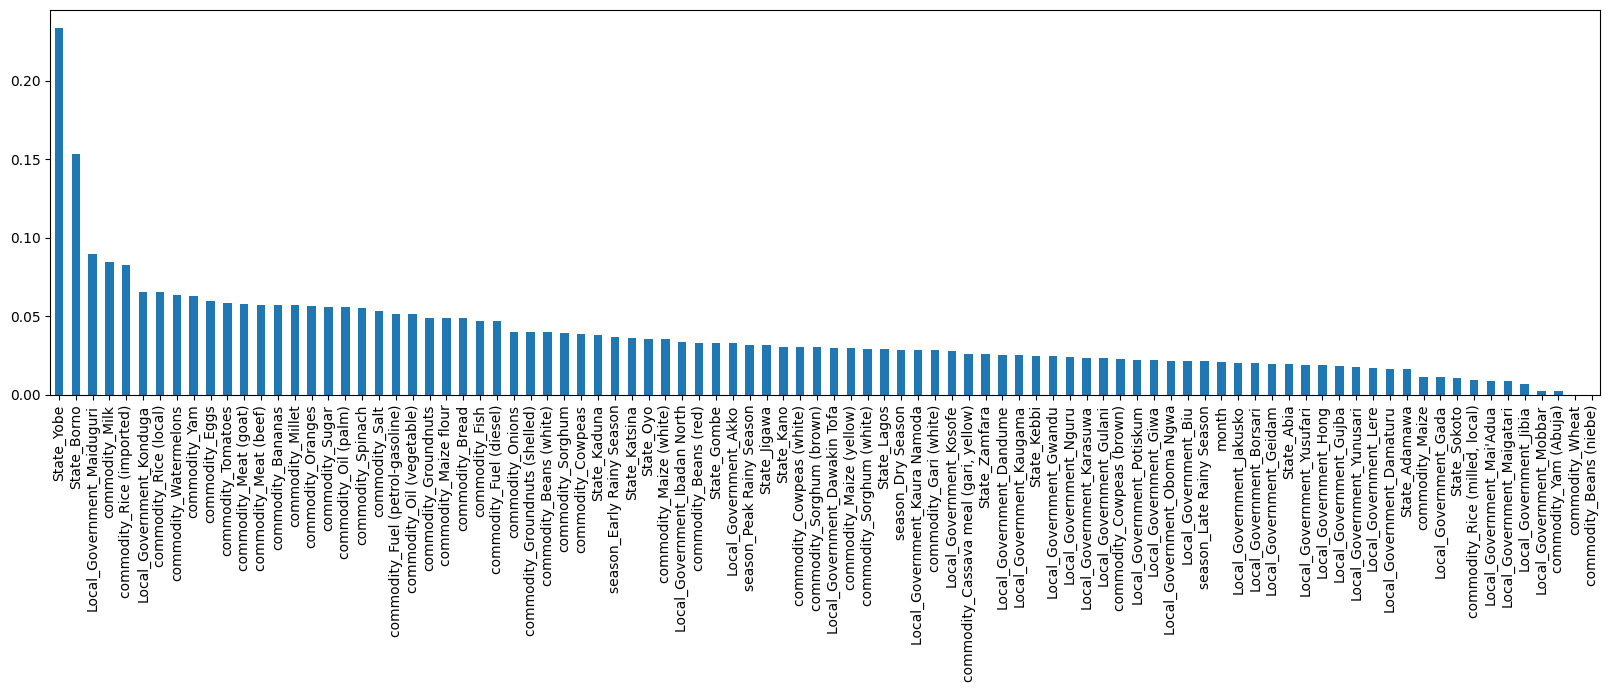

In [190]:
mul_info.sort_values(ascending=False).plot.bar(figsize=(20,5))

In [ ]:
Feature with high information gain has high importtance to the model

In [217]:
df_one_hot_encoded.to_csv('result_dataset.csv',index=False)

# Using the base line model

In [211]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [212]:
predictions = model.predict(X_test)

In [213]:
### Checking the accurecy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)  # Calculate RMSE
r2 = r2_score(Y_test, predictions)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 869.5691496154736
Mean Squared Error (MSE): 14170568.96966086
Root Mean Squared Error (RMSE): 3764.381618494711
R-squared (R²): 0.10613833234745096


In [214]:
## Decision tree
from sklearn.tree import DecisionTreeRegressor

treereg=DecisionTreeRegressor()
treereg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [215]:
predction_decsiontree=treereg.predict(X_test)

In [216]:
from sklearn.metrics import r2_score
r=r2_score(Y_test,predction_decsiontree)
print (r)

-0.09845294036751895
